### 이미지에서 얼굴 부분만 자르기(crop), 김남길, 이하늬, 열혈사제 출연진

In [1]:
# 글꼴 설치전 런타임 환경 확인
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# GPU 런타임 환경 설정

# 보안 문제로 ipynb 파일 open시마다 실행
from google.colab import drive
drive.mount('/content/drive') # 마운트 이름은 자유롭게 지정 가능

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%autosave 0
import warnings
warnings.filterwarnings(action='ignore')

import os
import time
import random
import datetime

import cv2
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   # one-hot 엔코딩

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import platform 

if (platform.system() == 'Windows'):  # Windows, Linux, Darwin
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd_ml/cnn/actor' # Colab

os.chdir(path) # 기본 경로 설정

plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline  

Autosave disabled


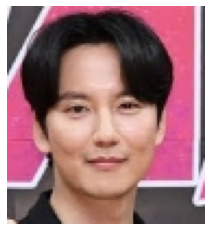

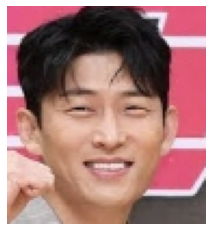

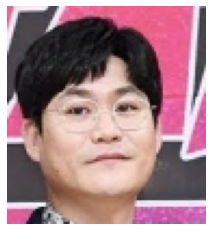

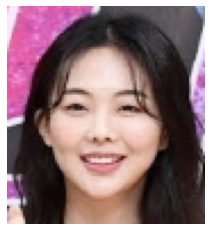

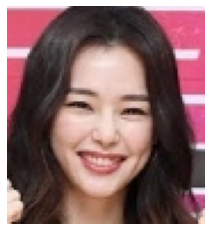

In [9]:
# 하나의 이미지의 얼굴을 검색하여 Crop

# CPU 기반
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

# img = cv2.imread('./kim.jpg')      # 김남길
# img = cv2.imread('./lee.jpg')     # 이하늬
img = cv2.imread('./father.jpg')  # 열혈사제 출연진 5명
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 이미지 배열, 지정한 형태를 찾을 정밀도(기본값: 1.1, 숫자가 낮을수록 정밀함),
# 이미지간의 간격(너무 낮으면 중복 검출됨(기본값: 3))
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
count = 0
for (x,y,w,h) in faces:
    # 원본 이미지에서 grey로 변환한 이미지에서 
    # 얼굴의 위치를 찾아서 그 위치를 기준으로 
    # 얼굴 크기만큼 이미지를 잘라냄
    cropped = img[y - int(h / 2.5):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)]

    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))  # 이미지 출력
    plt.axis("off") # off: 축을 출력하지 말것
    plt.show()      # 이미지 출력
        
    # BGR -> RGB 자동 변환되어 이미지로 저장
    count += 1
    now = datetime.datetime.now()
    nowDatetime = now.strftime('%Y%m%d%H%M%S')
    
    cv2.imwrite(nowDatetime + "_" + str(count) + ".jpg", cropped)

### [참고] 영화배우 이미지 파일 확인

In [ ]:
# 특정 폴더의 파일 목록 확인
import os

path = "./src/Colin firth"
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith(".jpg")]
for file in file_list_py:
    print ("file: {}".format(file))

file: 000001.jpg
file: 000002.jpg
file: 000003.jpg
file: 000004.jpg
file: 000005.jpg
file: 000006.jpg
file: 000007.jpg
file: 000008.jpg
file: 000009.jpg
file: 000010.jpg
file: 000011.jpg
file: 000012.jpg
file: 000015.jpg
file: 000016.jpg
file: 000018.jpg
file: 000019.jpg
file: 000020.jpg
file: 000024.jpg
file: 000025.jpg
file: 000026.jpg
file: 000029.jpg
file: 000030.jpg
file: 000031.jpg
file: 000032.jpg
file: 000033.jpg
file: 000035.jpg
file: 000036.jpg
file: 000037.jpg
file: 000038.jpg
file: 000039.jpg
file: 000040.jpg
file: 000041.jpg
file: 000042.jpg
file: 000043.jpg
file: 000045.jpg
file: 000046.jpg
file: 000047.jpg
file: 000048.jpg
file: 000049.jpg
file: 000050.jpg
file: 000051.jpg
file: 000052.jpg
file: 000053.jpg
file: 000054.jpg
file: 000055.jpg
file: 000056.jpg
file: 000057.jpg
file: 000058.jpg
file: 000059.jpg
file: 000061.jpg
file: 000062.jpg
file: 000064.jpg
file: 000065.jpg
file: 000066.jpg
file: 000067.jpg
file: 000068.jpg
file: 000069.jpg
file: 000070.jpg
file: 000074.j

### 영화배우 이미지 Crop
> 폴더이름을 한글로 지정하면 Crop이 안됨으로 영문으로 할것

In [ ]:
# 특정 폴더의 이미지의 얼굴을 검색하여 Crop
# 폴더명에 공백 가능
import os
import cv2
import datetime

import os

# /src 폴더의 원본 이미지를 crop하여 /src_crop 폴더로 저장함.
newfolder = './src_crop'
if os.path.exists(newfolder) == False:
    os.mkdir(newfolder)

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

# Amanda Seyfried, Andrew Lincoln, Anne Hathaway
# Keira Christina Knightley, Pierce Brosnan
# Zo Jung Seok, Jae Hong
cropDir = input('배우 이름을 입력하세요(Colin firth): ') 

path = "./src/" + cropDir  # /src/Jae Hong
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith(".jpg")]
count = 0

for file in file_list_py:
    print ("file: {}".format(file))
    img = cv2.imread("./src/" + cropDir + "/" + file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)
    for (x,y,w,h) in faces:
        cropped = img[y - int(h / 3.5):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)]
        
        # 이미지를 저장
        count += 1
        now = datetime.datetime.now()
        nowDatetime = now.strftime('%Y%m%d%H%M%S')
        
        # 폴더가 자동으로 생성이 안됨으로 직접 확인 후 생성
        if os.path.exists("./src_crop/" + cropDir) == False: # 폴더 생성
            os.mkdir("./src_crop/" + cropDir)
            
        cv2.imwrite("./src_crop/" + cropDir + "/" + nowDatetime + "_" + str(count) + ".jpg", cropped)


배우 이름을 입력하세요(Colin firth): Colin firth
file: 000001.jpg
file: 000002.jpg
file: 000003.jpg
file: 000004.jpg
file: 000005.jpg
file: 000006.jpg
file: 000007.jpg
file: 000008.jpg
file: 000009.jpg
file: 000010.jpg
file: 000011.jpg
file: 000012.jpg
file: 000015.jpg
file: 000016.jpg
file: 000018.jpg
file: 000019.jpg
file: 000020.jpg
file: 000024.jpg
file: 000025.jpg
file: 000026.jpg
file: 000029.jpg
file: 000030.jpg
file: 000031.jpg
file: 000032.jpg
file: 000033.jpg
file: 000035.jpg
file: 000036.jpg
file: 000037.jpg
file: 000038.jpg
file: 000039.jpg
file: 000040.jpg
file: 000041.jpg
file: 000042.jpg
file: 000043.jpg
file: 000045.jpg
file: 000046.jpg
file: 000047.jpg
file: 000048.jpg
file: 000049.jpg
file: 000050.jpg
file: 000051.jpg
file: 000052.jpg
file: 000053.jpg
file: 000054.jpg
file: 000055.jpg
file: 000056.jpg
file: 000057.jpg
file: 000058.jpg
file: 000059.jpg
file: 000061.jpg
file: 000062.jpg
file: 000064.jpg
file: 000065.jpg
file: 000066.jpg
file: 000067.jpg
file: 000068.jpg
file: 000